In [2]:
import requests
from bs4 import BeautifulSoup 

In [3]:
response= requests.get('https://www.sofascore.com/liverpool-chelsea/NsU#11352316', headers={'User-Agent': 'Mozilla/5.0'})

In [4]:
soup = BeautifulSoup(response.text, 'html.parser')

In [5]:
soup.select('g[cursor="pointer"]')

[]

In [6]:
headers = {
    'authority': 'api.sofascore.com',
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'if-none-match': 'W/"4f8d7de314"',
    'origin': 'https://www.sofascore.com',
    'referer': 'https://www.sofascore.com/',
    'sec-ch-ua': '"Chromium";v="116", "Not)A;Brand";v="24", "Microsoft Edge";v="116"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36 Edg/116.0.1938.54',
}

response = requests.get('https://api.sofascore.com/api/v1/event/11352316/shotmap', headers=headers)

In [7]:
response

<Response [200]>

In [8]:
headers['If-Modified-Since'] = 'Sun, 13 AUG 2023 00:00:00 GMT'

In [9]:
response = requests.get('https://api.sofascore.com/api/v1/event/11352316/shotmap', headers=headers)
response

<Response [200]>

In [10]:
shots = response.json()

In [11]:
shots

{'shotmap': [{'player': {'name': 'Darwin Núñez',
    'firstName': '',
    'lastName': '',
    'slug': 'darwin-nunez',
    'shortName': 'D. Núñez',
    'position': 'F',
    'userCount': 33645,
    'id': 924871},
   'isHome': False,
   'shotType': 'block',
   'situation': 'regular',
   'playerCoordinates': {'x': 23.4, 'y': 31.6, 'z': 0},
   'bodyPart': 'right-foot',
   'goalMouthLocation': 'low-centre',
   'goalMouthCoordinates': {'x': 0, 'y': 48.6, 'z': 19},
   'blockCoordinates': {'x': 21.5, 'y': 33.2, 'z': 0},
   'xg': 0.014030817896128,
   'id': 2143518,
   'time': 90,
   'addedTime': 3,
   'timeSeconds': 5520,
   'draw': {'start': {'x': 31.6, 'y': 23.4},
    'block': {'x': 33.2, 'y': 21.5},
    'end': {'x': 51.4, 'y': 0},
    'goal': {'x': 51.4, 'y': 81}},
   'reversedPeriodTime': 1,
   'reversedPeriodTimeSeconds': 780,
   'incidentType': 'shot'},
  {'player': {'name': 'Darwin Núñez',
    'firstName': '',
    'lastName': '',
    'slug': 'darwin-nunez',
    'shortName': 'D. Núñez',
 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from highlight_text import fig_text
import matplotlib as mpl
from mplsoccer.pitch import Pitch
import openpyxl
import os 

In [13]:
os.chdir("D:\DataSets")

In [14]:
text_color = 'w'
data = pd.read_excel('Book.xlsx')
data

,Player,Min,Second,T,x,y,Shot Type,xG
0,D. Jota,2,72,LIV,13.30,47.1,Missed,0.022569
1,D. Jota,6,33,LIV,13.20,64.9,Missed,0.047952
2,E. Fernández,11,65,CHE,9.00,66.6,Blocked,0.060327
3,M. Salah,12,67,LIV,18.10,47.2,Post,0.079918
4,N. Jackson,16,91,CHE,7.00,55.3,Saved,0.126661
5,L. Díaz,18,10,LIV,10.00,45.5,Goal,0.513766
6,N. Jackson,24,14,CHE,11.70,36.1,Missed,0.043981
7,M. Salah,26,15,LIV,14.90,55.5,Blocked,0.165936
8,A. Disasi,37,21,CHE,4.80,49.4,Goal,0.414813
9,M. Salah,41,24,LIV,14.10,68.5,Missed,0.034433


Text(0.11, 0.03, '@GauravKSingh1/ GitHub')

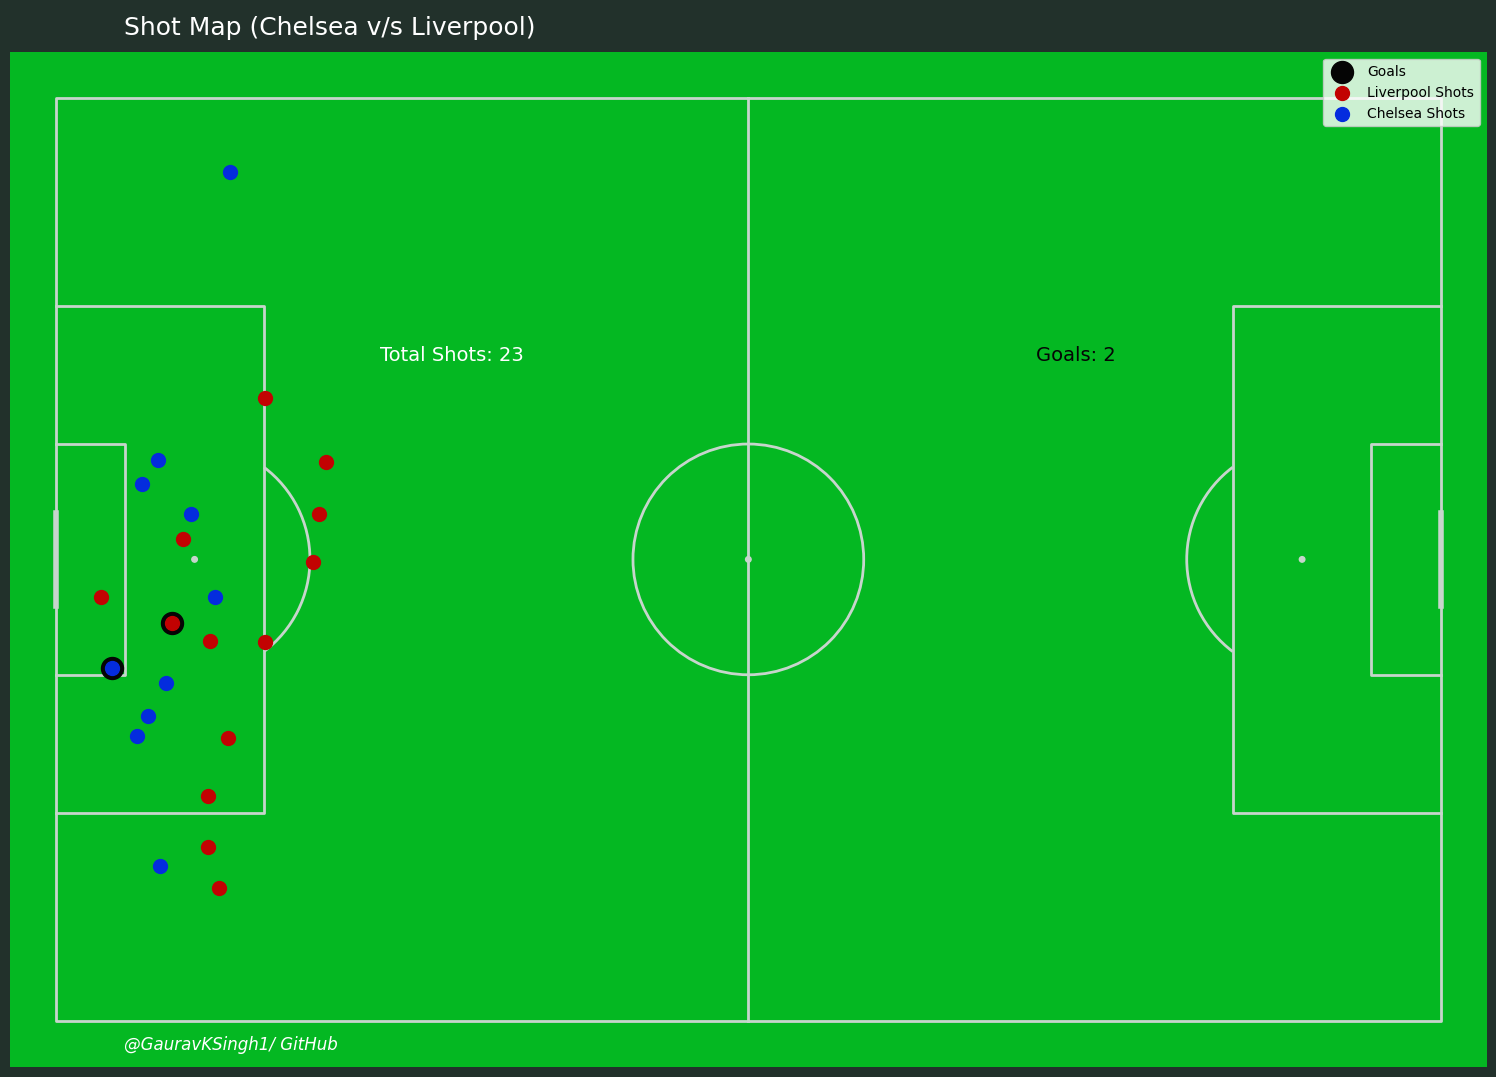

In [59]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#04b822', line_color='#c7d5cc')
fig, ax = plt.subplots(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

pitch.draw(ax=ax)


goals = data[data['Shot Type'] == 'Goal']
plt.scatter(goals['x'], goals['y'], s=250, c='#050505', alpha=1, label='Goals')

# Scatter plot for shots by Liverpool 
liverpool_shots = data[data['T'] == 'LIV']
plt.scatter(liverpool_shots['x'], liverpool_shots['y'], s=100, c='#c20202', alpha=1, label='Liverpool Shots')

# Scatter plot for shots by Chelsea 
chelsea_shots = data[data['T'] == 'CHE']
plt.scatter(chelsea_shots['x'], chelsea_shots['y'], s=100, c='#042cde', alpha=1, label='Chelsea Shots')

ax.legend(loc='upper right')


s='Shot Map (Chelsea v/s Liverpool)'
fig_text(s=s, x=.11, y=.97, fontsize=18, color=text_color)


total_shots = len(data)

fig_text(s=f'Total Shots: {total_shots}', x=.27, y =.67, fontsize=14, color=text_color)

fig_text(s=f'Goals: 2', x=.68, y =.67, fontsize=14, color='#050505')

fig.text(.11,.03,f'@GauravKSingh1/ GitHub',fontstyle='italic',fontsize=12, color=text_color)


In [34]:
df = pd.read_excel('Book 1.xlsx')
df

,Player,Min,Second,T,x,y,Shot Type,xG
0,E. Fernández,11,65,CHE,9.00,66.6,Blocked,0.060327
1,N. Jackson,16,91,CHE,7.00,55.3,Saved,0.126661
2,N. Jackson,24,14,CHE,11.70,36.1,Missed,0.043981
3,A. Disasi,37,21,CHE,4.80,49.4,Goal,0.414813
4,N. Jackson,43,25,CHE,7.99,53.6,Missed,0.130519
5,A. Disasi,45,30,CHE,9.50,50.7,Missed,0.058743
6,B. Chilwell,55,32,CHE,8.80,31.4,Saved,0.158496
7,R. James,62,36,CHE,15.10,6.4,Missed,0.033789
8,L. Colwill,65,38,CHE,13.80,43.3,Blocked,0.082728
9,N. Jackson,71,42,CHE,7.40,33.5,Saved,0.243989


In [41]:
a_xG = [0]
h_xG = [0]
a_min = [0]
h_min = [0]

hteam = df['T'].iloc[0]
ateam = df['T'].iloc[-1]

for x in range(len(data['xG'])):
    if df['T'][x] == ateam:
        a_xG.append(df['xG'][x])
        a_min.append(df['Min'][x])
    if df['T'][x] == hteam:
        h_xG.append(df['xG'][x])
        h_min.append(df['Min'][x])

# Function to calculate cumulative sum
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i + 1]) for i in range(len(nums_list))]

# Calculate cumulative xG for both teams
a_cumulative = nums_cumulative_sum(a_xG)
h_cumulative = nums_cumulative_sum(h_xG)

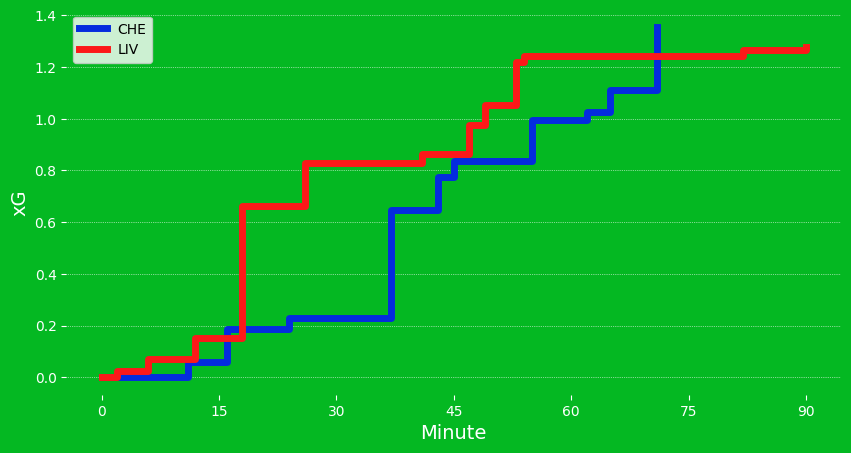

In [64]:
fig, ax = plt.subplots(figsize=(10, 5))
fig.set_facecolor('#04b822')
ax.patch.set_facecolor('#04b822')

mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'

ax.grid(ls='dotted', lw=0.5, color='white', axis='y', zorder=1)
spines = ['top', 'bottom', 'left', 'right']
for x in spines:
    ax.spines[x].set_visible(False)

plt.xticks([0, 15, 30, 45, 60, 75, 90])
plt.xlabel('Minute', color='white', fontsize=14)
plt.ylabel('xG', color='white', fontsize=14)

ax.step(x=h_min, y=h_cumulative, color='#042cde', label=hteam, linewidth=5, where='post', linestyle='-', alpha=1)
ax.step(x=a_min, y=a_cumulative, color='#fc1919', label=ateam, linewidth=5, where='post', linestyle='-', alpha=1)

ax.legend(loc='upper left', fontsize=10)

plt.show()